In [ ]:
import pandas as pd

import re
!pip install emoji
import emoji  # Install via pip install emoji


import nltk
from nltk.tokenize import word_tokenize  # Add this impor

nltk.download('punkt')          # General tokenizer data

!pip install pyarabic
from pyarabic.araby import tokenize  # Import Arabic tokenizer

nltk.download('stopwords')
from nltk.corpus import stopwords

from nltk.stem.isri import ISRIStemmer  # Stemmer for Arabic'

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 8.0 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.4/126.4 kB 2.3 MB/s eta 0:00:00


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Data Collection step :

In [ ]:
# Load the Excel file dataset into a dataframe
df = pd.read_excel('combined_dataset.xlsx')

In [ ]:
# Keep only the 'label' and 'text' columns from the DataFrame
df = df[['label', 'text']]
df

,label,text
0,1,والله شايفيتلك الناس كلها صاير عندها اكتئاب لا...
1,1,اكيد اكتئاب بعد العصر ما في زيه بس ان شاء الله...
2,1,والله ما أنا عارف هو اكتئاب ولا انطفاء ولا نضج...
3,1,اصبروا داخله في حاله اكتئاب 💔😭
4,1,هذا اكتئاب ولا
...,...,...
11853,1,قلنا ان اهلي مايحبوني مو لدرجه اصحي وماحصل احد...
11854,0,يوم جميل جدا
11855,0,الهم ابي سندي الهم امي نبضي الهم اخواني ...
11856,1,اكره الدوام واكره الجامعه واكره الصباح


In [ ]:
# Remove rows with empty values
df.dropna(inplace=True)
# Remove duplicate rows
df = df.drop_duplicates()

In [ ]:
# Check if the dataset is balanced by showing class distribution percentages
print("Class Distribution:\n", df['label'].value_counts(normalize=True))

Class Distribution:
 label
1    0.500211
0    0.499789
Name: proportion, dtype: float64


In [ ]:
# Get information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 11843 entries, 0 to 11857
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   11843 non-null  int64 
 1   text    11843 non-null  object
dtypes: int64(1), object(1)
memory usage: 277.6+ KB
None


# Data Preprocessing :

In [ ]:

# Get NLTK Arabic stopwords and normalize them

"""
#Stopwords Removal Problem
#My text was normalized, but NLTK stopwords were not. So,
#they didn’t match, and stopwords weren’t removed. I fixed it by normalizing the
#stopwords too and saving them in a set called normalized_stopwords."""



arabic_stopwords = set(stopwords.words('arabic'))

normalized_stopwords = set()

for word in arabic_stopwords:
    # Apply the same normalization as your text
    word = re.sub("[إأآا]", "ا", word)  # Normalize Alef
    word = re.sub("ى", "ي", word)       # Normalize Ya
    word = re.sub("[ؤئ]", "ء", word)    # Normalize Hamza
    normalized_stopwords.add(word)



def data_cleaner(text):

    # Step 1: Remove URLs, hashtags, mentions
    text = re.sub(r'http\S+', '', text)        # Remove URLs
    text = re.sub(r'[@#]\w+', '', text)        # Remove mentions (@) and hashtags (#)

    # Step 2: Normalize Arabic text (remove diacritics)
    text = re.sub(r'[\u0617-\u061A\u064B-\u0652]', '', text)  # Remove Arabic diacritics

    # Step 3: Normalize Hamza and Alef variations
    text = re.sub("[إأآا]", "ا", text)         # Normalize Alef variations
    text = re.sub("ى", "ي", text)              # Normalize Ya
    text = re.sub("ؤ", "ء", text)              # Normalize Hamza
    text = re.sub("ئ", "ء", text)              # Normalize Hamza

    # Step 4: Remove emojis (using emoji library + regex)
    text = emoji.replace_emoji(text, replace='')  # Remove emojis using the emoji library

    # Step 5: Remove punctuation and special characters
    arabic_punct = r'[،؛؟.!\"\'\(\)\[\]\{\}:;,\.\?]'  # Define Arabic punctuation
    text = re.sub(arabic_punct, ' ', text)     # Replace with space

    # Step 6: Remove numbers
    text = re.sub(r'\d+', '', text)            # Remove digits

    # Step 7: Remove English letters (A-Za-z)
    text = re.sub(r'[A-Za-z]', '', text)       # Remove English characters

    # Step 8: Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text).strip()   # Collapse multiple spaces

    # Step 9: Tokenize the cleaned text
    tokens = tokenize(text)  # Arabic-specific tokenization

    # Debugging: Print tokens to verify
    #print(f"Original: {text}")
    #print(f"Tokens: {tokens}")

    # Step 10: Remove stopwrods
    tokens = [word for word in tokens if word not in normalized_stopwords]

    #Step 11: Stem tokens

    # Initialize stemmer
    stemmer = ISRIStemmer()
    tokens = [stemmer.stem(word) for word in tokens]

    # Step 12: Remove any remaining garbage characters
    tokens = [word for word in tokens if re.match(r'^[\u0620-\u064A]+$', word)]

    # Join tokens and return the cleaned text
    cleaned_text = " ".join(tokens)

    return cleaned_text

In [ ]:
# Apply data_cleaner function on the dataset text
df['text'] = df['text'].apply(lambda x: data_cleaner(x))
print(df.head())

   label                                               text
0      1   ولل شايفيتلك ناس كله صير عند كءب لزم فكو حظر بكف
1      1  اكد كءب عصر زيه شاء الل عيد دا اشف عمل تطع خير...
2      1                        ولل عرف كءب طفء نضج وحد وحد
3      1                                    صبر دخل حله كءب
4      1                                                كءب


<ipython-input-10-d53f6699c614>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].apply(lambda x: data_cleaner(x))


In [ ]:
print(df.info())  # Get information about the dataset

<class 'pandas.core.frame.DataFrame'>
Index: 11843 entries, 0 to 11857
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   11843 non-null  int64 
 1   text    11843 non-null  object
dtypes: int64(1), object(1)
memory usage: 277.6+ KB
None


In [ ]:
df = df[df['text'].str.strip().astype(bool)]  # Remove empty texts

In [ ]:
print(df.info())  # Get information about the dataset

<class 'pandas.core.frame.DataFrame'>
Index: 11838 entries, 0 to 11857
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   11838 non-null  int64 
 1   text    11838 non-null  object
dtypes: int64(1), object(1)
memory usage: 277.5+ KB
None


# Feature Extraction & Feature Selection

In [ ]:
# Vectorivation

from sklearn.feature_extraction.text import TfidfVectorizer
# Initialize the TF-IDF vectorizer with custom settings

#Feature Selection:

tfidf = TfidfVectorizer(
    #max_features=5000,
    #ngram_range=(1, 2),
    # convert the normalized_stopwrods set to a list to make it work correctly with vectorization step
    #stop_words= list(normalized_stopwords),
    max_features=10000,        # Use the top 10,000 most important words
    ngram_range=(1, 3),        # Include unigrams, bigrams, and trigrams
    min_df=3,                  # Ignore words that appear in fewer than 3 documents
    max_df=0.9                 # Ignore words that appear in more than 90% of the documents

)

#Feature Extraction:

# Apply the vectorizer to the 'text' column to convert it into numeric features
X = tfidf.fit_transform(df['text'])
# Set the target labels (depressed = 1, non-depressed = 0)
y = df['label']

In [ ]:
print(tfidf.get_feature_names_out()[:20])  # peek at vocabulary


['ءثر' 'ءجر' 'ءخر' 'ءذي' 'ءسف' 'ءشر' 'ءقت' 'ءكد' 'ءلم' 'ءلم تنم'
 'ءلم تنم ليل' 'ءلم جمل' 'ءلم جمل ذكر' 'ءمر' 'ءمن' 'ءمن افق' 'ءمن افق غيب'
 'اءم' 'ااه' 'ابا']


# Feature Classification

In [ ]:
 # Split into training (80%) and testing (20%)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,  # TF-IDF vectors (features)
    y,  # Labels (0 = non-depressed, 1 = depressed)
    test_size=0.2,  # 20% for testing
    random_state=42,  # ensures the split is the same every time (for reproducibility)
    stratify=y # Ensures balanced class distribution in both sets
)

print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")





Training samples: 9470
Testing samples: 2368




# Decision Tree

a model that asks yes/no questions to split the data step-by-step, like a flowchart, until it makes a final decision — such as 'depressed' or 'not depressed’



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

#create the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

#You train the model using your training data (X_train) and labels (y_train)
dt_model.fit(X_train, y_train)

#The model makes predictions on new (test) data
y_pred = dt_model.predict(X_test)

#print a report showing how well the model did (accuracy, precision, recall, etc.)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91      1183
           1       0.90      0.92      0.91      1185

    accuracy                           0.91      2368
   macro avg       0.91      0.91      0.91      2368
weighted avg       0.91      0.91      0.91      2368



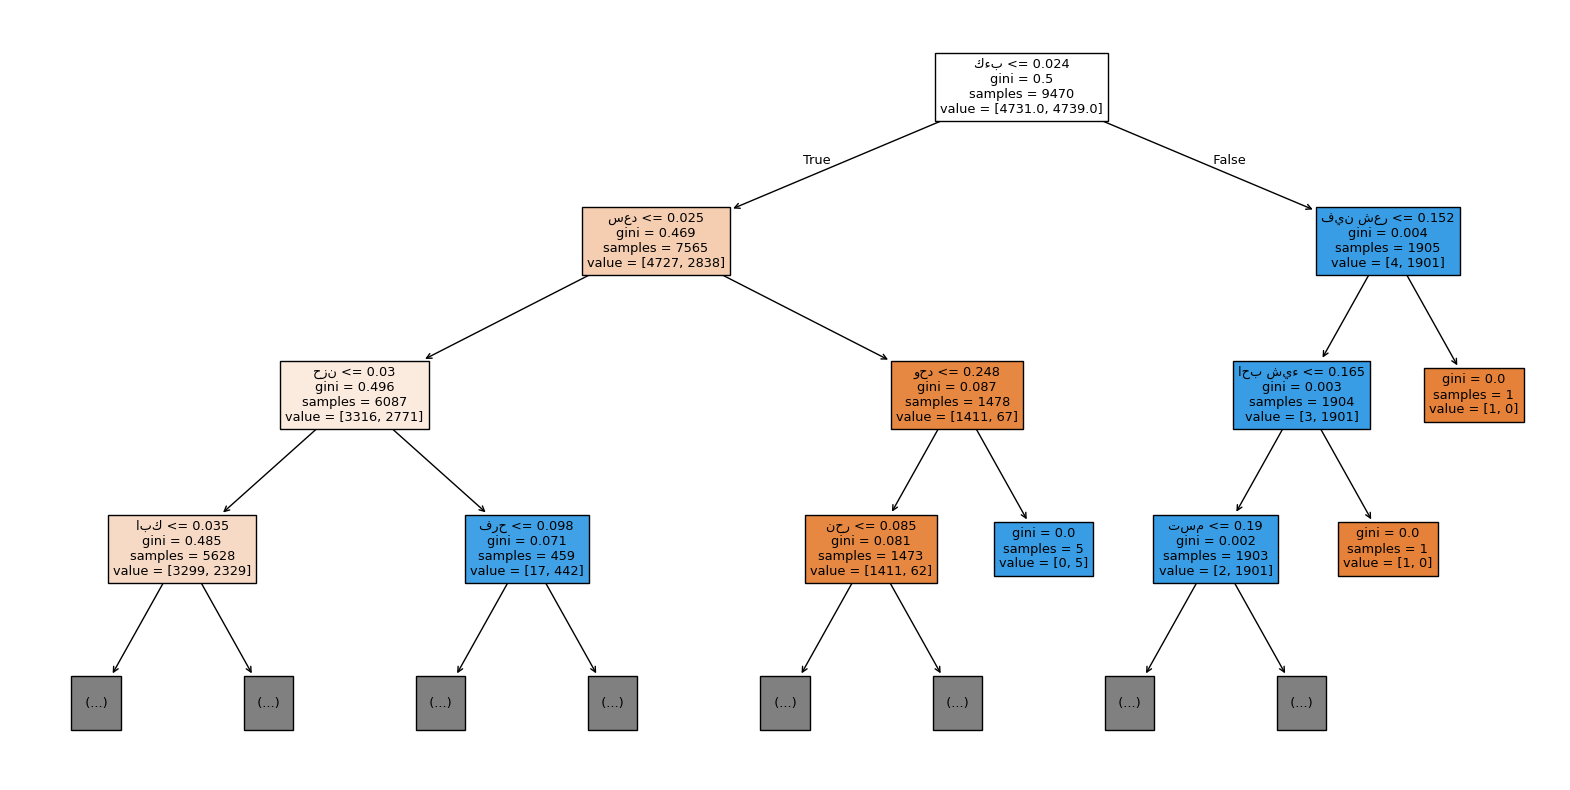

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

#Set the size of the tree diagram (wider and taller to make it readable)
plt.figure(figsize=(20, 10))

#filled=True colors the boxes to show class results.
#feature_names=... shows the words used in decisions.
#max_depth=3 limits the tree to the top 3 levels (for clarity).
plot_tree(dt_model, filled=True, feature_names=tfidf.get_feature_names_out(), max_depth=3)

plt.show()

# SVM [ Support Vector Machine ]
a machine learning model that tries to draw a line (or boundary) that best separates classes (like depressed vs. not depressed)

In [ ]:
from sklearn.svm import SVC  # Import SVM classifier

# Initialize SVM with a linear kernel
svm_model = SVC(kernel='linear', random_state=42)

# Train the model
svm_model.fit(X_train, y_train)

# Evaluate on the test set
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94      1183
           1       0.96      0.93      0.94      1185

    accuracy                           0.94      2368
   macro avg       0.94      0.94      0.94      2368
weighted avg       0.94      0.94      0.94      2368



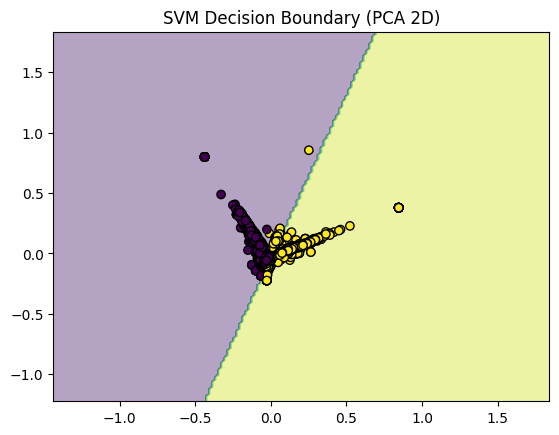

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Reduce TF-IDF features to 2D
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_train.toarray())

# Fit SVM on reduced data
svm_vis = SVC(kernel='linear')
svm_vis.fit(X_reduced, y_train)

# Plot
h = .02
x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = svm_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_train, edgecolors='k')
plt.title("SVM Decision Boundary (PCA 2D)")
plt.show()


# Logistic Regression
It works by calculating a probability for each class (0 or 1).
If the probability > 0.5 → class 1, else → class 0

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Initialize the model
lr_model = LogisticRegression(random_state=42, max_iter=1000)

# Train the model
lr_model.fit(X_train, y_train)

# Predict on test set
y_pred = lr_model.predict(X_test)

# Print results
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.93      0.96      0.94      1183
           1       0.95      0.93      0.94      1185

    accuracy                           0.94      2368
   macro avg       0.94      0.94      0.94      2368
weighted avg       0.94      0.94      0.94      2368



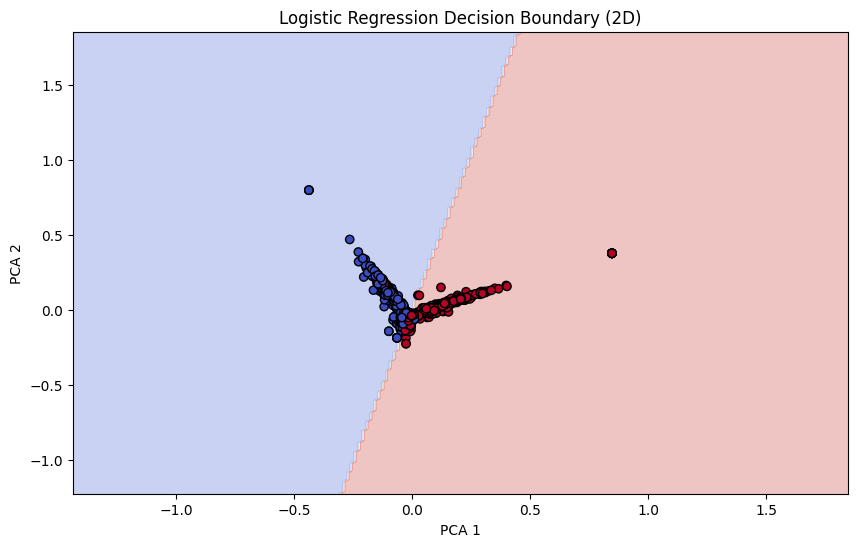

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Reduce TF-IDF features to 2D for plotting
pca = PCA(n_components=2)
X_train_2D = pca.fit_transform(X_train.toarray())
X_test_2D = pca.transform(X_test.toarray())

# Train logistic regression on 2D data
lr_model = LogisticRegression()
lr_model.fit(X_train_2D, y_train)

# Create a mesh to plot decision boundary
x_min, x_max = X_train_2D[:, 0].min() - 1, X_train_2D[:, 0].max() + 1
y_min, y_max = X_train_2D[:, 1].min() - 1, X_train_2D[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))
Z = lr_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_test_2D[:, 0], X_test_2D[:, 1], c=y_test, cmap=plt.cm.coolwarm, edgecolors='k')
plt.title("Logistic Regression Decision Boundary (2D)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()


# Naive Bayes
It assumes that all words (features) are independent — that's why it's called "naive".

It calculates:
➤ How likely is each class given the words in a sentence?
➤ Picks the class with the highest probability.

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# Initialize the Naive Bayes model
nb_model = MultinomialNB()

# Train the model
nb_model.fit(X_train, y_train)

# Predict on test data
y_pred = nb_model.predict(X_test)

# Print evaluation metrics
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.94      0.90      0.92      1183
           1       0.90      0.94      0.92      1185

    accuracy                           0.92      2368
   macro avg       0.92      0.92      0.92      2368
weighted avg       0.92      0.92      0.92      2368



# K-Nearest Neighbors (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Initialize KNN model with k=5 (you can change this number)
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn_model.fit(X_train, y_train)

# Predict on test data
y_pred = knn_model.predict(X_test)

# Print evaluation metrics
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.84      0.81      0.83      1183
           1       0.82      0.85      0.83      1185

    accuracy                           0.83      2368
   macro avg       0.83      0.83      0.83      2368
weighted avg       0.83      0.83      0.83      2368



# Stochastic Gradient Descent (SGD)

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report

# Initialize SGD model with a loss function (e.g., 'hinge' for SVM-like or 'log_loss' for logistic regression)
sgd_model = SGDClassifier(loss='hinge', random_state=42)

# Train the model
sgd_model.fit(X_train, y_train)

# Predict on test set
y_pred = sgd_model.predict(X_test)

# Evaluate the results
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94      1183
           1       0.96      0.93      0.94      1185

    accuracy                           0.94      2368
   macro avg       0.94      0.94      0.94      2368
weighted avg       0.94      0.94      0.94      2368



# Ensemble Models

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      1183
           1       0.94      0.93      0.93      1185

    accuracy                           0.94      2368
   macro avg       0.94      0.94      0.94      2368
weighted avg       0.94      0.94      0.94      2368



# XGBoost (Extreme Gradient Boosting)

In [ ]:
!pip install xgboost
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# Initialize the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on test set
y_pred = xgb_model.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:34:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1183
           1       0.97      0.91      0.94      1185

    accuracy                           0.94      2368
   macro avg       0.94      0.94      0.94      2368
weighted avg       0.94      0.94      0.94      2368



# Voting Classifier

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB

voting_model = VotingClassifier(
    estimators=[
        ('lr', LogisticRegression(max_iter=1000)),
        ('svm', SVC(kernel='linear', probability=True)),
        ('nb', MultinomialNB())
    ],
    voting='soft'
)

voting_model.fit(X_train, y_train)
y_pred = voting_model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.94      0.95      0.94      1183
           1       0.95      0.94      0.94      1185

    accuracy                           0.94      2368
   macro avg       0.94      0.94      0.94      2368
weighted avg       0.94      0.94      0.94      2368



# AdaBoost (Adaptive Boosting)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

adaboost_model = AdaBoostClassifier(n_estimators=100, random_state=42)
adaboost_model.fit(X_train, y_train)
y_pred = adaboost_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.99      0.87      1183
           1       0.98      0.71      0.83      1185

    accuracy                           0.85      2368
   macro avg       0.88      0.85      0.85      2368
weighted avg       0.88      0.85      0.85      2368



# Stacking (Stacked Generalization)

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

base_models = [
    ('svm', SVC(kernel='linear', probability=True)),
    ('nb', MultinomialNB())
]

stack_model = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression())
stack_model.fit(X_train, y_train)
y_pred = stack_model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.94      0.95      0.95      1183
           1       0.95      0.94      0.94      1185

    accuracy                           0.94      2368
   macro avg       0.94      0.94      0.94      2368
weighted avg       0.94      0.94      0.94      2368



# Deep Learning

# Multi-Layer Perceptron (MLP)

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

# Initialize MLP model
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)

# Train the model
mlp_model.fit(X_train, y_train)

# Predict on test set
y_pred = mlp_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      1183
           1       0.92      0.92      0.92      1185

    accuracy                           0.92      2368
   macro avg       0.92      0.92      0.92      2368
weighted avg       0.92      0.92      0.92      2368



# LSTM (Long Short-Term Memory)

Vocabulary size: 6633
Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step - accuracy: 0.7403 - loss: 0.5176 - precision_2: 0.7638 - recall_2: 0.6899

119/119 ━━━━━━━━━━━━━━━━━━━━ 67s 462ms/step - accuracy: 0.7412 - loss: 0.5163 - precision_2: 0.7647 - recall_2: 0.6910 - val_accuracy: 0.9359 - val_loss: 0.1794 - val_precision_2: 0.9299 - val_recall_2: 0.9470
Epoch 2/15
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - accuracy: 0.9610 - loss: 0.1316 - precision_2: 0.9663 - recall_2: 0.9542

119/119 ━━━━━━━━━━━━━━━━━━━━ 78s 425ms/step - accuracy: 0.9609 - loss: 0.1318 - precision_2: 0.9663 - recall_2: 0.9541 - val_accuracy: 0.9374 - val_loss: 0.1736 - val_precision_2: 0.9327 - val_recall_2: 0.9470
Epoch 3/15
119/119 ━━━━━━━━━━━━━━━━━━━━ 54s 452ms/step - accuracy: 0.9761 - loss: 0.0829 - precision_2: 0.9788 - recall_2: 0.9734 - val_accuracy: 0.9422 - val_loss: 0.1831 - val_precision_2: 0.9467 - val_recall_2: 0.9409
Epoch 4/15
119/119 ━━━━━━━━━━━━━━━━━━━━ 53s 449ms/step - accuracy: 0.9876 - loss: 0.0526 - precision_2: 0.9886 - recall_2: 0.9870 - val_accuracy: 0.9285 - val_loss: 0.2184 - val_precision_2: 0.9171 - val_recall_2: 0.9470
Epoch 5/15
119/119 ━━━━━━━━━━━━━━━━━━━━ 81s 438ms/step - accuracy: 0.9918 - loss: 0.0356 - precision_2: 0.9921 - recall_2: 0.9915 - val_accuracy: 0.9190 - val_loss: 0.2552 - val_precision_2: 0.9090 - val_recall_2: 0.9368


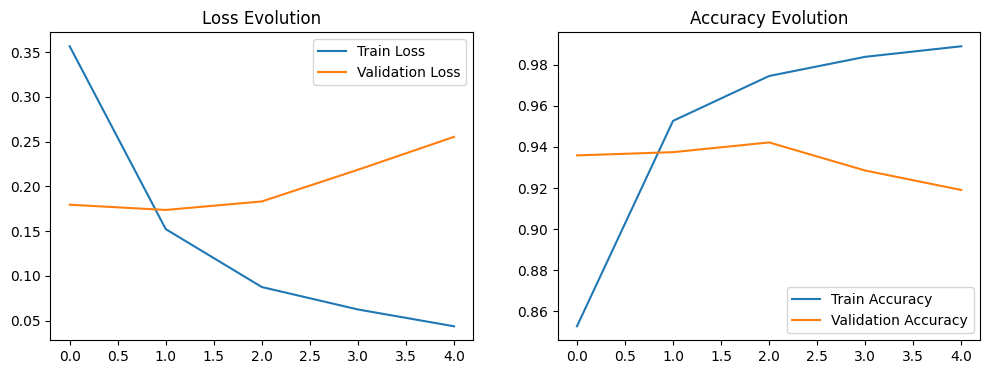

74/74 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from imblearn.over_sampling import RandomOverSampler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Make sure X_train contains the raw text data, not a sparse matrix
# If X_train is a sparse matrix, you need to get the original text data

X = df['text']  # Raw text
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)  # X_train should be a list/array of strings

vocab_size = len(tokenizer.word_index) + 1
print(f"Vocabulary size: {vocab_size}")

# Convert text to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences
max_len = 100  # Adjust based on your text length distribution
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

# Handle class imbalance
# Need to reshape for RandomOverSampler
X_train_reshaped = X_train_pad.reshape(X_train_pad.shape[0], -1)
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train_reshaped, y_train)

# Reshape back to original dimensions
X_train_resampled = X_train_resampled.reshape(-1, max_len)

# LSTM Model
embedding_dim = 128  # Dimension of word embeddings
lstm_units = 64      # Number of LSTM units

model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len),
    Bidirectional(LSTM(lstm_units, return_sequences=True)),
    Dropout(0.5),
    Bidirectional(LSTM(lstm_units//2)),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)


# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_lstm_model.h5', save_best_only=True, monitor='val_loss')

# Train the model
history = model.fit(
    X_train_resampled,
    y_train_resampled,
    validation_split=0.2,
    epochs=15,
    batch_size=64,
    callbacks=[early_stopping, model_checkpoint],
    verbose=1
)

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Evolution')
plt.show()

# Load best model
lstm_model = tf.keras.models.load_model('best_lstm_model.h5')

# Evaluate on test set
y_pred_probs = lstm_model.predict(X_test_pad)
y_pred = (y_pred_probs > 0.5).astype(int)



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_probs)

print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")

print(lstm_model.summary())



Accuracy: 94.47%
Precision: 0.95
Recall: 0.95
F1 Score: 0.95
ROC-AUC: 0.98


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ (None, 100, 128)       │       849,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_4 (Bidirectional) │ (None, 100, 128)       │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 100, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_5 (Bidirectional) │ (None, 64)             │        41,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 989,123 (3.77 MB)

 Trainable params: 989,121 (3.77 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

None


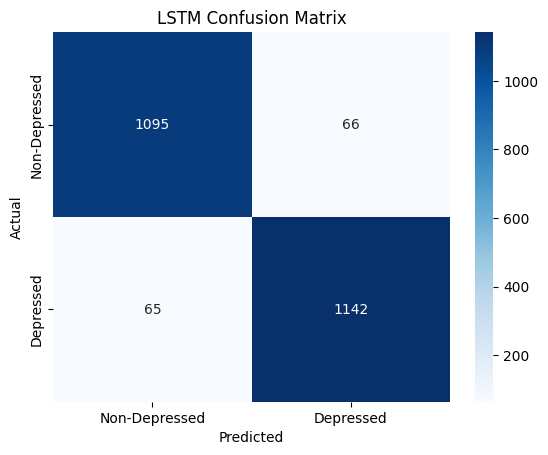

Model and tokenizer saved successfully.


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Prediction: Depressed
Probability: 0.9989


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Depressed', 'Depressed'],
            yticklabels=['Non-Depressed', 'Depressed'])
plt.title('LSTM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Save tokenizer and model
import pickle

# Save tokenizer
with open('lstm_tokenizer.pkl', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Save model architecture + weights
model.save('lstm_model.h5')

print("Model and tokenizer saved successfully.")

# Example of loading and using the model
loaded_model = tf.keras.models.load_model('lstm_model.h5')

with open('lstm_tokenizer.pkl', 'rb') as handle:
    loaded_tokenizer = pickle.load(handle)

def predict_depression(text):
    cleaned_text = data_cleaner(text)
    seq = loaded_tokenizer.texts_to_sequences([cleaned_text])
    padded = pad_sequences(seq, maxlen=max_len, padding='post')
    prob = loaded_model.predict(padded)[0][0]
    prediction = 1 if prob > 0.5 else 0
    return prediction, prob

new_text = "اشعر بالاكتئاب"  # Replace with your text
prediction, probability = predict_depression(new_text)
print(f"Prediction: {'Depressed' if prediction == 1 else 'Non-Depressed'}")
print(f"Probability: {probability:.4f}")

# CNN (Convolutional Neural Network)

# Cofusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

NameError: name 'y_test' is not defined

In [ ]:
!pip install xgboost
